# Case study on Pre-processing

##### Do the following on titanic dataset.

##### 1. Load the dataset into python environment

##### 2. Make ‘PassengerId’ as the index column

##### 3. Check the basic details of the dataset

##### 4. Fill in all the missing values present in all the columns in the dataset

##### 5. Check and handle outliers in at least 3 columns in the dataset

##### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 1. Load the dataset into python environment

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [3]:
data.set_index('PassengerId',inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Insights:

There are 891 rows and 11 columns in the dataset. Also, there are null values present in t dataset with the column 'Age' has 177 null values, the column 'Cabin' has 687 null values and the column 'Embarked' has 2 null values.

## 4. Fill in all the missing values present in all the columns in the dataset

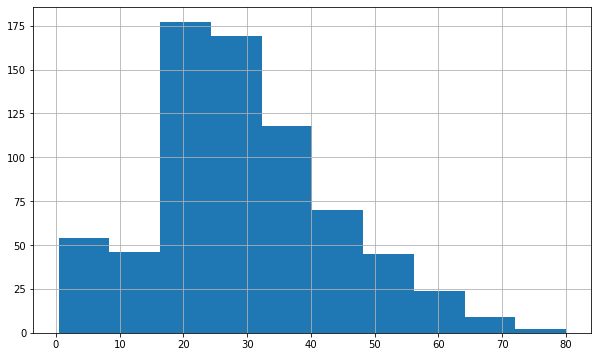

In [8]:
# plotting histogram to find skewness of Age
freqgraph = (data['Age'])
freqgraph.hist(figsize=(10,6))
plt.show()

In [9]:
#since Age is right skewed, missing values can be filled with median
data['Age'].fillna(data['Age'].median(),inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
#Null values of 'Embarked' column can be filled with mode as it categorical
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) 
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
#We can drop 'Cabin' column from the dataset since 687 out of 891 rows have null value in this column. 
data.drop(['Cabin'],axis=1,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, ' Box plot of Age')

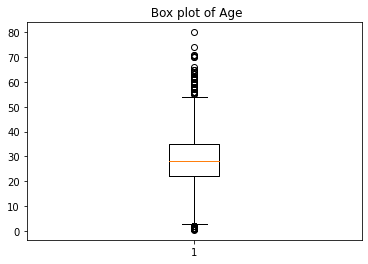

In [13]:
plt.boxplot(data['Age'])
plt.title(' Box plot of Age')

In [14]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [16]:
data['Age'].median()

28.0

In [17]:
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  13.0
Lower limit is :  2.5
Upper limit is :  54.5


In [18]:
outlier=[]
for x in data['Age']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [19]:
ind1 = data['Age'] < low_limit
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [20]:
ind2 = data['Age'] > upper_limit
data.loc[ind2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [21]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

In [22]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace=True)

Text(0.5, 1.0, ' Box plot of Age')

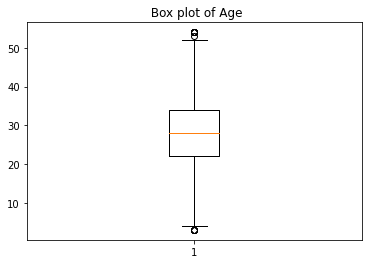

In [23]:
plt.boxplot(data['Age'])
plt.title(' Box plot of Age')

Text(0.5, 1.0, ' Box plot of Fare')

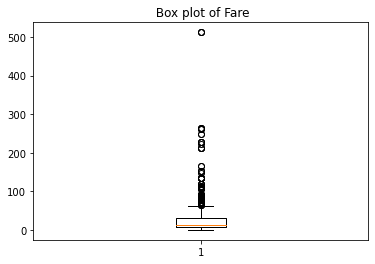

In [24]:
plt.boxplot(data['Fare'])
plt.title(' Box plot of Fare')

In [25]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [26]:
print(Q2)
print(Q3)
print(Q1)

13.4167
30.0708
7.8958


In [27]:
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  22.174999999999997
Lower limit is :  -25.366699999999994
Upper limit is :  63.333299999999994


In [28]:
outlier=[]
for x in data['Fare']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [29]:
# Replacing outlier values with upper limit and lower limit 
data['Fare']=np.where(data['Fare']>upper_limit,upper_limit,np.where(data['Fare']<low_limit,low_limit,data['Fare']))
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,63.3333,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, ' Box plot of Fare')

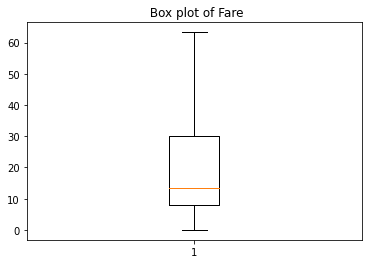

In [30]:
plt.boxplot(data['Fare'])
plt.title(' Box plot of Fare')

Text(0.5, 1.0, ' Box plot of SibSp')

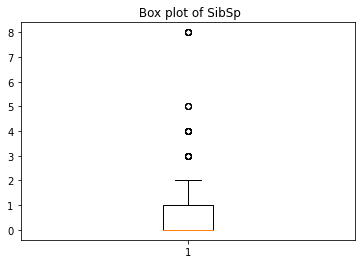

In [31]:
plt.boxplot(data['SibSp'])
plt.title(' Box plot of SibSp')

In [32]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [33]:
data['SibSp'].median()

0.0

In [34]:
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  1.0
Lower limit is :  -1.5
Upper limit is :  2.5


In [35]:
outlier=[]
for x in data['SibSp']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [36]:
# Replacing outlier values with upper limit and lower limit 
data['SibSp']=np.where(data['SibSp']>upper_limit,upper_limit,np.where(data['SibSp']<low_limit,low_limit,data['SibSp']))

Text(0.5, 1.0, ' Box plot of SibSp')

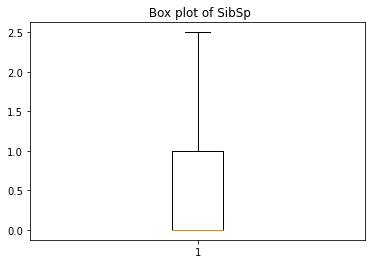

In [37]:
plt.boxplot(data['SibSp'])
plt.title(' Box plot of SibSp')

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [38]:
data.drop(['Name'],axis = 1,inplace=True)
data.drop(['Ticket'],axis = 1,inplace=True)

In [39]:
data = pd.get_dummies(data)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,1,0,0,1
2,1,1,38.0,1.0,0,63.3333,1,0,1,0,0
3,1,3,26.0,0.0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1.0,0,53.1000,1,0,0,0,1
5,0,3,35.0,0.0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0.0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0.0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1.0,2,23.4500,1,0,0,0,1


In [40]:
#before scaling
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y = data['Survived']
x = data.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
pred=model.predict(x_test)

print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.1326851835183366
R squared value is  0.4471450686735975


In [41]:
y = data['Survived']
x = data.drop('Survived', axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2.341818,28.515152,0.415152,0.357576,23.177434,0.356364,0.643636,0.184242,0.088485,0.727273
std,0.824096,10.177256,0.693731,0.798599,19.830076,0.479215,0.479215,0.387917,0.284171,0.445632
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.416700,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,1.000000,0.000000,30.070800,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.500000,6.000000,63.333300,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#performing minmax scaling
min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
x = min_max.fit_transform(x)
print(x)
x=pd.DataFrame(x)
x.describe()

[[2.         0.74509804 0.8        ... 0.         0.         2.        ]
 [0.         1.37254902 0.8        ... 2.         0.         0.        ]
 [2.         0.90196078 0.         ... 0.         0.         2.        ]
 ...
 [2.         0.98039216 0.8        ... 0.         0.         2.        ]
 [0.         0.90196078 0.         ... 2.         0.         0.        ]
 [2.         1.1372549  0.         ... 0.         2.         0.        ]]


,0,1,2,3,4,5,6,7,8,9
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,1.341818,1.000594,0.332121,0.119192,0.731919,0.712727,1.287273,0.368485,0.176970,1.454545
std,0.824096,0.399108,0.554985,0.266200,0.626213,0.958430,0.958430,0.775834,0.568342,0.891264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.745098,0.000000,0.000000,0.249341,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.980392,0.000000,0.000000,0.423685,0.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,1.215686,0.800000,0.000000,0.949605,2.000000,2.000000,0.000000,0.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [43]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,2.341818,28.515152,0.415152,0.357576,23.177434,0.356364,0.643636,0.184242,0.088485,0.727273
std,0.485830,0.824096,10.177256,0.693731,0.798599,19.830076,0.479215,0.479215,0.387917,0.284171,0.445632
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,54.000000,2.500000,6.000000,63.333300,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# MSE and r-squared after Scaling
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
pred=model.predict(x_test)

print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.1326851835183366
R squared value is  0.4471450686735975


#### Insights:

The model is comparatively good after performing min-max scaling with target column 'Survived', The MSE and R-squared values on applying linear regression are

MSE : 0.13488866167474592
R-squared : 0.4437622125198798